<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/stat_dz1_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('https://github.com/vn322/RUDN_Lab_Works/raw/refs/heads/main/2.1.2.%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%B4%D0%BB%D1%8F%20%D0%B4.%D0%B7.%20%E2%84%961.xls')

# ПЕРЕМЕННЫЕ

y – Совокупная выручка за 2004 год, (тыс. руб.)

х1 -  в том числе выручка по аудиторским проверкам (тыс. руб.)

х2 - среднее число специалистов

х3 - выручка на одного специалиста (тыс. руб.)

х4 - число аттестованных аудиторов.


In [3]:
df.head(3)

,group,Y,X1,X2,X3,X4
0,Deloitte,1709721,922797,589,2563,150
1,"""БДО Юникон""",1074836,501656,584,1969,181
2,ФБК,735656,287642,390,1886,90


Задание:
1. Составьте матрицу парных коэффициентов корреляции. Установите, какие факторы коллинеарны.
2. Постройте уравнение регрессии, характеризующее зависимость Y  за счет значимых факторов.
3. Какие факторы значимо воздействуют на формирование Совокупной выручки в этой модели? Дайте экономическую интерпретацию коэффициентов модели регрессии. Оцените качество построенной модели.
4. Ранжируйте консалтинговые группы  по степени их эффективности.
5. Рассчитайте доверительный интервал для каждого наблюдения,  (уровень значимости примите равным 5%).  Укажите консалтинговые группы, в которых фактические значения показателя Совокупная выручка превышают граничные значения.


полнота данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   43 non-null     object
 1   Y       43 non-null     int64 
 2   X1      43 non-null     int64 
 3   X2      43 non-null     int64 
 4   X3      43 non-null     int64 
 5   X4      43 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


In [5]:
df['group'] = df['group'].astype(str)

описательныек статистики

In [6]:
df[['Y', 'X1', 'X2', 'X3', 'X4']].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,Y,X1,X2,X3,X4
count,4.300000e+01,43.000000,43.000000,43.000000,43.000000
mean,3.133051e+05,131854.302326,175.209302,2172.953488,70.209302
std,3.137285e+05,162345.228524,148.580515,1585.169030,58.507451
min,6.366000e+04,13251.000000,7.000000,697.000000,4.000000
5%,6.488220e+04,15445.200000,30.400000,830.900000,7.500000
25%,1.004540e+05,37955.000000,71.500000,1204.000000,29.500000
50%,2.169070e+05,85484.000000,117.000000,1783.000000,45.000000
75%,4.379985e+05,160747.500000,243.000000,2336.000000,116.500000
95%,7.323232e+05,416870.300000,506.400000,3933.100000,180.400000
max,1.709721e+06,922797.000000,589.000000,9094.000000,217.000000


# матрица корреляций

In [7]:
df[['Y', 'X1', 'X2', 'X3', 'X4']].corr()

,Y,X1,X2,X3,X4
Y,1.000000,0.952405,0.867698,-0.036682,0.671559
X1,0.952405,1.000000,0.792693,-0.011867,0.618208
X2,0.867698,0.792693,1.000000,-0.237699,0.847898
X3,-0.036682,-0.011867,-0.237699,1.000000,-0.236032
X4,0.671559,0.618208,0.847898,-0.236032,1.000000


видим высокую статистическую связь между зависимой переменной и Х1 (Совокупная выручка - выручка по аудиторским проверкам )

наглядное отображение на тепловой карте

<Axes: >

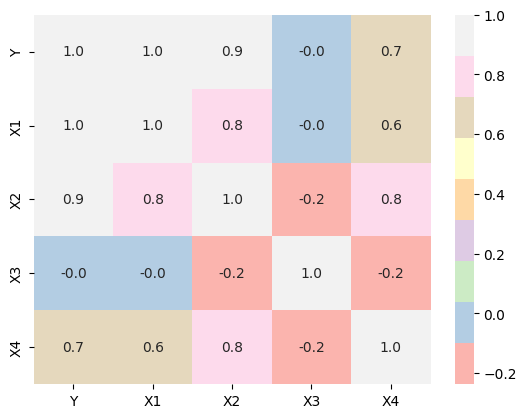

In [8]:
sns.heatmap(df[['Y', 'X1', 'X2', 'X3', 'X4']].corr(), annot=True, fmt=".1f",cmap="Pastel1" )

матрица корреляций для независимых переменных

видим коллинеарность для пар Х1-Х2 и Х2-Х4

In [9]:
df[[ 'X1', 'X2', 'X3', 'X4']].corr()

,X1,X2,X3,X4
X1,1.000000,0.792693,-0.011867,0.618208
X2,0.792693,1.000000,-0.237699,0.847898
X3,-0.011867,-0.237699,1.000000,-0.236032
X4,0.618208,0.847898,-0.236032,1.000000


In [25]:
c = df[[ 'X1', 'X2', 'X3', 'X4']].corr()
np.fill_diagonal(c.values, 0)
s = c.unstack()
s.sort_values(kind="quicksort", ascending= False)[:4]

,,0
X2,X4,0.847898
X4,X2,0.847898
X1,X2,0.792693
X2,X1,0.792693


<Axes: >

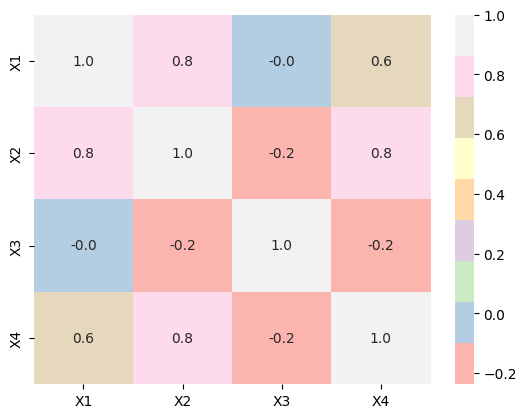

In [10]:
sns.heatmap(df[[ 'X1', 'X2', 'X3', 'X4']].corr(), annot=True, fmt=".1f",cmap="Pastel1" )

# регрессионные модели

первая модель самая простаявыражающая выявленную статистическую связь У-Х1 (Совокупная выручка - выручка по аудиторским проверкам)

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
lin_res = ols("Y ~ X1",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     400.2
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           9.11e-23
Time:                        11:02:20   Log-Likelihood:                -553.65
No. Observations:                  43   AIC:                             1111.
Df Residuals:                      41   BIC:                             1115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.063e+04   1.91e+04      3.697      0.0

получаем высоко продуктивную модель и на этом можно закончить :)

построим модель У - Х2+Х3 выбросив X1 и Х4 коррелирующие с Х2

In [13]:
lin_res = ols("Y ~ X2+X3",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     72.33
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           5.18e-14
Time:                        11:02:20   Log-Likelihood:                -571.84
No. Observations:                  43   AIC:                             1150.
Df Residuals:                      40   BIC:                             1155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.008e+05   5.29e+04     -1.904      0.0

всё стало гораздо грустнее

попробуем убрать Х2 (среднее число специалистов)

In [26]:
lin_res = ols("Y ~ X1+X3+X4",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     145.9
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           3.07e-21
Time:                        11:05:40   Log-Likelihood:                -550.90
No. Observations:                  43   AIC:                             1110.
Df Residuals:                      39   BIC:                             1117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.834e+04   3.33e+04      1.153      0.2

получаем самую продуктивную и информативную модель по всем критериям

в завершение, наплевав на мультиколлинеарность можем посмотреть как выглядит модель учитывающая все факторы

In [14]:
lin_res = ols("Y ~ X1+X2+X3+X4",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     166.0
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           1.64e-23
Time:                        11:02:20   Log-Likelihood:                -542.03
No. Observations:                  43   AIC:                             1094.
Df Residuals:                      38   BIC:                             1103.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1877.4238   2.89e+04     -0.065      0.9

# эффективность

построим прогноз на основании полученной модели и сравним его с реальной совокупной выручкой

In [15]:
df['predict']= -1877.4238 + df['X1']*1.3039 + df['X2']*893.9505 + df['X3']*9.9112 - 497.1139 * df['X4']

In [16]:
df[['Y','predict']]

,Y,predict
0,1709721,1.678730e+06
1,1074836,1.103836e+06
2,735656,6.957719e+05
3,702328,8.083941e+05
4,694331,6.174135e+05
5,560592,2.988828e+05
6,497910,6.602269e+05
7,463182,3.021368e+05
8,459148,3.821685e+05
9,444806,3.675701e+05


определим эффективность как различие между реальной и прогнозируемой выручкой

In [17]:
df['effect']  = df['Y']-df['predict']

проранжируем исследуемые организации по их эффективности

In [18]:
df[['group','effect']].sort_values(by=['effect'], ascending=False)

,group,effect
5,"""2К Аудит - деловые консультации""",261709.1537
7,"""Развитие бизнес-систем""",161045.1526
19,"""Совтекс""",77625.4608
9,"""HLB ВнешПаккУниверс""",77235.9451
8,"""ФинЭкспертиза""",76979.4675
4,"""РСМ Топ-Аудит""",76917.5173
13,ЭКФИ,76367.5921
10,"""Гориславцев и К.Аудит""",60847.0384
11,"""МООР СТИВЕНС БалЭН""",53180.9755
21,"""Экфард""",46471.4236


# Рассчёт доверительного интервала

In [19]:
import scipy
# Стандартное отклонение генеральной совокупности
sigma = 0.8
# Математическое ожидание генеральной совокупности
mean  = 4.1
# Формируем выборку из генеральной совокупности
# Объем выборки
n = 30
# Выборка
data = df['Y']
# Надежность оценки (доверительная вероятность)
gamma = 0.95
# Оценка математического ожидания выборки
mean_of_sample = np.mean(data)
# Стандартное отклонение выборочной средней
sigma_of_mean = scipy.stats.sem(data)

In [20]:
interval = scipy.stats.norm.interval(gamma, loc = mean_of_sample, scale = sigma_of_mean)
print('Математическое ожидание принадлежит интервалу [{:4.2f}; {:4.2f}]'.format(interval[0],interval[1]))


Математическое ожидание принадлежит интервалу [219534.22; 407075.92]


наблюдения меньше интервала

In [40]:
df[df['Y']<219534.22]

,group,Y,X1,X2,X3,X4,predict,effect
21,"""Экфард""",216907,53243,97,2234,12,170435.5764,46471.4236
22,"""Налоговое бюро""",207400,147669,79,1589,33,260634.4129,-53234.4129
23,"""Аудит - новые технологии""",193012,127455,194,2234,59,330549.4484,-137537.4484
24,МКД,191619,48519,117,2625,41,171613.9389,20005.0611
25,"""Современные бизнес-технологии""",187075,85484,75,1783,35,176904.1344,10170.8656
26,БМК,153412,72959,194,995,115,219373.7588,-65961.7588
27,"""Аудитинформ""",130890,34763,156,1638,87,155891.9662,-25001.9662
28,Аюдар,124184,122426,34,3652,23,212910.2373,-88726.2373
29,"""Новгородаудит""",108750,40981,103,2924,41,152233.2825,-43483.2825
30,"""Фемида-Аудит""",108542,37497,103,1056,41,129176.3733,-20634.3733


наблюдения больше интервала

In [39]:
df[df['Y']>407075.92]

,group,Y,X1,X2,X3,X4,predict,effect
0,Deloitte,1709721,922797,589,2563,150,1.678730e+06,30991.2504
1,"""БДО Юникон""",1074836,501656,584,1969,181,1.103836e+06,-29000.4635
2,ФБК,735656,287642,390,1886,90,6.957719e+05,39884.0528
3,"""Росэкспертиза""",702328,431229,327,2148,132,8.083941e+05,-106066.1056
4,"""РСМ Топ-Аудит""",694331,222419,456,1523,188,6.174135e+05,76917.5173
5,"""2К Аудит - деловые консультации""",560592,112213,163,3439,51,2.988828e+05,261709.1537
6,"""BKR-Интерком-Аудит""",497910,232105,512,972,217,6.602269e+05,-162316.9118
7,"""Развитие бизнес-систем""",463182,101900,190,2438,46,3.021368e+05,161045.1526
8,"""ФинЭкспертиза""",459148,152327,287,1600,175,3.821685e+05,76979.4675
9,"""HLB ВнешПаккУниверс""",444806,161143,201,2210,85,3.675701e+05,77235.9451
